In [1]:
import numpy as np
import pandas as pd

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity
from ipywidgets import interact

from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/content/data (1).csv')

In [3]:
# checking the shape of the dataset
print('Shape of the dataset is: ' , data.shape)

Shape of the dataset is:  (2200, 8)


In [4]:
# checking the columns Names
print(data.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [5]:
# checking dataset data of first 10 rows by using head function..
print(data.head(10))

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
5  69  37  42    23.058049  83.370118  7.073454  251.055000  rice
6  69  55  38    22.708838  82.639414  5.700806  271.324860  rice
7  94  53  40    20.277744  82.894086  5.718627  241.974195  rice
8  89  54  38    24.515881  83.535216  6.685346  230.446236  rice
9  68  58  38    23.223974  83.033227  6.336254  221.209196  rice


In [6]:
#checking null values to prevent errors
data.isnull().sum()



,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [7]:
# checking the crops preset in our dataset and quantity of it..
data['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [8]:
# checking the summary of all crops

print('Average Ratio of Nitrogen in the soil : {0:2f}'.format(data['N'].mean()))
print('Average Ratio of Phosphorous in the soil : {0:2f}'.format(data['P'].mean()))
print('Average Ratio of Potassium in the soil : {0:2f}'.format(data['K'].mean()))
print('Average Temperature in Celsius : {0:2f}'.format(data['temperature'].mean()))
print('Average Relative Humidity in % : {0:2f}'.format(data['humidity'].mean()))
print('Average PH value of the soil: {0:2f}'.format(data['ph'].mean()))
print('Average Rainfall in mm: {0:2f}'.format(data['rainfall'].mean()))


Average Ratio of Nitrogen in the soil : 50.551818
Average Ratio of Phosphorous in the soil : 53.362727
Average Ratio of Potassium in the soil : 48.149091
Average Temperature in Celsius : 25.616244
Average Relative Humidity in % : 71.481779
Average PH value of the soil: 6.469480
Average Rainfall in mm: 103.463655


In [9]:

print('Crops which require very high Ratio of Nitrogen Content in soil :', data[data['N']>120]['label'].unique())

print('Crops which require very high Ratio of Phosphorous Content in soil :', data[data['P']>100]['label'].unique())

print('Crops which require very high Ratio of Potassium Content in soil :', data[data['K']>200]['label'].unique())

print('Crops which require very high Ratio of Rainfall Content in soil :', data[data['rainfall']>200]['label'].unique())

print('Crops which require very low Temperature :', data[data['temperature']<10]['label'].unique())

print('Crops which require very high Temperature :', data[data['temperature']>40]['label'].unique())

print('Crops which require very low HUmidity :', data[data['humidity']<20]['label'].unique())

print('Crops which require very low PH :', data[data['ph']<4]['label'].unique())

print('Crops which require very high PH :', data[data['ph']>9]['label'].unique())



Crops which require very high Ratio of Nitrogen Content in soil : ['cotton']
Crops which require very high Ratio of Phosphorous Content in soil : ['grapes' 'apple']
Crops which require very high Ratio of Potassium Content in soil : ['grapes' 'apple']
Crops which require very high Ratio of Rainfall Content in soil : ['rice' 'papaya' 'coconut']
Crops which require very low Temperature : ['grapes']
Crops which require very high Temperature : ['grapes' 'papaya']
Crops which require very low HUmidity : ['chickpea' 'kidneybeans']
Crops which require very low PH : ['mothbeans']
Crops which require very high PH : ['mothbeans']


In [10]:
# Understanding which crops can on be grown in summer,winter season and rainy season

print('Summer Season Crops')
print(data[(data['temperature']>30) &(data['humidity']>50)]['label'].unique())
print('-------------------------------------------------')
print('Winter Season Crops')
print(data[(data['temperature']<20) &(data['humidity']>30)]['label'].unique())
print('-------------------------------------------------')
print('Rainy Season Crops')
print(data[(data['rainfall']>200) &(data['humidity']>30)]['label'].unique())

Summer Season Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-------------------------------------------------
Winter Season Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-------------------------------------------------
Rainy Season Crops
['rice' 'papaya' 'coconut']


In [11]:
from sklearn.cluster import KMeans

#Removing the label column cause there is no need of label in clustering
x = data.drop(['label'],axis=1)

#Selecting all the values of the data
x = x.values

print(x.shape)

(2200, 7)


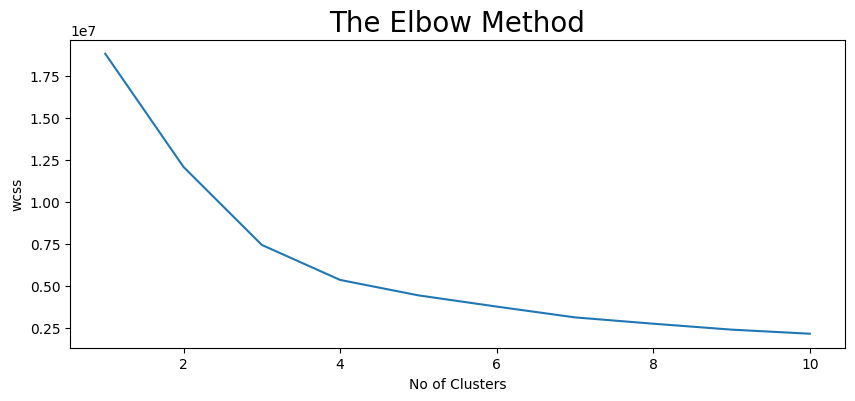

In [12]:
# determine the Optimum Number of Cluster withing dataset
plt.rcParams['figure.figsize']=(10,4)

wcss = []
for i  in range(1,11):
    km = KMeans(n_clusters = i, init= 'k-means++', max_iter = 300, n_init = 10, random_state =0)
    km.fit(x)
    wcss.append(km.inertia_)

#lets plot the results
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()

In [13]:
# implementing the KMeans algorithm to perform Clustering analysis

km=KMeans(n_clusters = 4, init= 'k-means++', max_iter = 300, n_init = 10, random_state =0)
y_means = km.fit_predict(x)

#lets find out the Results
a = data['label']
y_means= pd.DataFrame(y_means)
z= pd.concat([y_means, a], axis =1)
z=z.rename(columns = {0: 'cluster'})



In [14]:
#let check the clusters of each Crops
print('Crops in First cluster : ', z[z['cluster']==0]['label'].unique())
print('Crops in Second cluster : ', z[z['cluster']==1]['label'].unique())
print('Crops in Third cluster : ', z[z['cluster']==2]['label'].unique())
print('Crops in Fourth cluster : ', z[z['cluster']==3]['label'].unique())

Crops in First cluster :  ['grapes' 'apple']
Crops in Second cluster :  ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Crops in Third cluster :  ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Crops in Fourth cluster :  ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [15]:
y = data['label']
x = data.drop(['label'], axis = 1)

print('Shape of x: ', x.shape)
print('Shape of Y: ', y.shape)


Shape of x:  (2200, 7)
Shape of Y:  (2200,)


In [16]:
# let create training and testing sets for validation of results

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

print('The Shape of x Train: ', x_train.shape)
print('The Shape of x Test: ', x_test.shape)
print('The Shape of y Train: ', y_train.shape)
print('The Shape of y Train: ', y_test.shape)

The Shape of x Train:  (1760, 7)
The Shape of x Test:  (440, 7)
The Shape of y Train:  (1760,)
The Shape of y Train:  (440,)


In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred= model.predict(x_test)

In [18]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compute additional metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use 'weighted' average for multiclass
recall = recall_score(y_test, y_pred, average='weighted') # Use 'weighted' average for multiclass
f1 = f1_score(y_test, y_pred, average='weighted') # Use 'weighted' average for multiclass

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9681818181818181
Precision: 0.9699452867394045
Recall: 0.9681818181818181
F1 Score: 0.9681168080082031


In [24]:
prediction = model.predict(np.array([[120,
                                     90,
                                     80,
                                     20,
                                     20,
                                     10,
                                     200]]))
print('The Suggested Crop for Given Climatic Condition is: ', prediction)

The Suggested Crop for Given Climatic Condition is:  ['banana']


In [25]:
import pickle

# Save the trained model to a pickle file
filename = 'crop_recommendation_model.pkl'
pickle.dump(model, open(filename, 'wb'))

print(f"Model saved to {filename}")

Model saved to crop_recommendation_model.pkl
